In [183]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
import numpy as np
import matplotlib.pyplot as plt

In [184]:
#!pip install xgboost
#!pip install lightgbm

# Voting system

In [185]:
train = pd.read_excel('아버지아들키.xlsx', sheet_name='train')
test = pd.read_excel('아버지아들키.xlsx', sheet_name='test')

In [186]:
train

,Father,Son
0,165.100,151.892
1,165.100,160.782
2,167.132,159.512
3,155.194,163.322
4,160.020,163.068
...,...,...
750,186.182,172.466
751,167.132,154.940
752,181.102,173.482
753,179.578,176.022


### train test split

In [187]:
X_train = train["Father"]
y_train = train["Son"]
X_test = test["Father"]
y_test = test["Son"]

In [188]:
X_train = X_train.to_numpy().reshape(-1, 1)
X_test = X_test.to_numpy().reshape(-1, 1)

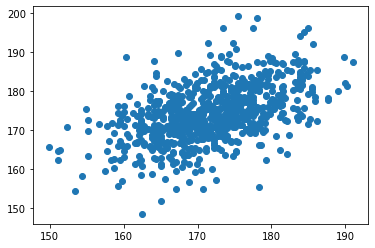

In [189]:
#데이터 확인
plt.scatter(X_train, y_train)
plt.show()

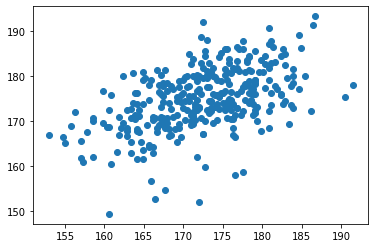

In [190]:
plt.scatter(X_test, y_test)
plt.show()

### 모델 선언, 학습

In [191]:
#voting을 위해 서로다른 3개의 모델에 같은 데이터를 학습, 예측시키기
model1 = LinearRegression()
model2 = KNeighborsRegressor(n_neighbors= 50)
model3 = DecisionTreeRegressor() 
modelR= RandomForestRegressor(n_estimators= 700)
modelG = GradientBoostingRegressor()
modelLG = LGBMRegressor()
modelXG = xgb.XGBRegressor()

In [192]:
model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
modelR.fit(X_train, y_train)
modelG.fit(X_train, y_train)
modelLG.fit(X_train, y_train)
modelXG.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [193]:
pred1 = model1.predict(X_test)
pred2 = model2.predict(X_test)
pred3 = model3.predict(X_test)
pred4 = modelR.predict(X_test)
pred5 = modelG.predict(X_test)
pred6 = modelLG.predict(X_test)
pred7 = modelXG.predict(X_test)

In [194]:
print("선형회귀 모델 성능: " , r2_score(y_test, pred1))
print("KNN 모델 성능: " , r2_score(y_test, pred2))
print("Dtree 모델 성능: " , r2_score(y_test, pred3))
print("forest 모델 성능: " , r2_score(y_test, pred4))
print("Gd 모델 성능: " , r2_score(y_test, pred5))
print("LG 모델 성능: " , r2_score(y_test, pred6))
print("XG 모델 성능: " , r2_score(y_test, pred7))



선형회귀 모델 성능:  0.2519977905846619
KNN 모델 성능:  0.2434867959852367
Dtree 모델 성능:  0.07133438875422093
forest 모델 성능:  0.12245341370807938
Gd 모델 성능:  0.18554360914749402
LG 모델 성능:  0.18113480901854329
XG 모델 성능:  0.07841681998519068


In [195]:
#과대적합 확인을 위한 train 점수 확인
# pred1 = model1.predict(X_train)
# pred2 = model2.predict(X_train)
# pred3 = model3.predict(X_train)

In [196]:
# print("선형회귀 모델 성능: " , r2_score(y_train, pred1))
# print("KNN 모델 성능: " , r2_score(y_train, pred2))
# print("tree 모델 성능: " , r2_score(y_train, pred3))

In [197]:
# 그냥 평균
avg_predict = (pred1 + pred2 + pred3 + pred4 + pred5 + pred6 + pred7)/7
print("평균 모델 성능: " , r2_score(y_test, avg_predict))

평균 모델 성능:  0.19618790700815858


In [198]:
# 가중 평균(중심극한정리?) = 분산도 감소
avg_predict2 = ((pred1*24) + (pred2*25) + (pred3*7)+ (pred4*18))/74
print("평균 모델 성능: " , r2_score(y_test, avg_predict))

평균 모델 성능:  0.19618790700815858


In [199]:
#np.cov = 분산구하는 함수(리스트)
print(np.cov(pred1))
print(np.cov(pred2))
print(np.cov(pred3))
print(np.cov(pred4))
print(np.cov(avg_predict))
print(np.cov(avg_predict2))

13.020016090787738
11.681305648013176
18.70637762177803
16.65864157320043
13.376216094511115
12.425089948020325


## 다음 모델들의 성능을 비교하는 Bar 그래프를 그려봅시다.

In [205]:
x = ["LiR","KNR","DT","RF","GD","LG","XG"]
y = [r2_score(y_test,pred1),r2_score(y_test,pred2),r2_score(y_test,pred3),r2_score(y_test,pred4)
     ,r2_score(y_test,pred5),r2_score(y_test,pred6),r2_score(y_test,pred7)]

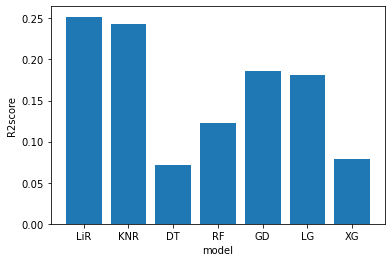

In [207]:
plt.bar(x,y)
plt.xlabel("model")
plt.ylabel("R2score")
plt.show()